<a href="https://colab.research.google.com/github/speacock103/AIFall2019/blob/master/hw2/HW2P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading fashion data set and formatting data for models

In [0]:
#imports
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

#fashion data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#reshape and normalize input
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_labels.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)

(60000,)
(60000, 10)


# Underfitting MNIST Fashion data set

Train on 2000 samples, validate on 10000 samples
Epoch 1/5
2000/2000 [==============================] - 7s 4ms/step - loss: 1.3265 - acc: 0.5670 - val_loss: 0.9916 - val_acc: 0.6564
Epoch 2/5
2000/2000 [==============================] - 1s 405us/step - loss: 0.8633 - acc: 0.7080 - val_loss: 0.8076 - val_acc: 0.7070
Epoch 3/5
2000/2000 [==============================] - 1s 390us/step - loss: 0.7375 - acc: 0.7425 - val_loss: 0.7250 - val_acc: 0.7390
Epoch 4/5
2000/2000 [==============================] - 1s 396us/step - loss: 0.6583 - acc: 0.7730 - val_loss: 0.6963 - val_acc: 0.7472
Epoch 5/5
2000/2000 [==============================] - 1s 390us/step - loss: 0.6138 - acc: 0.7900 - val_loss: 0.6587 - val_acc: 0.7698


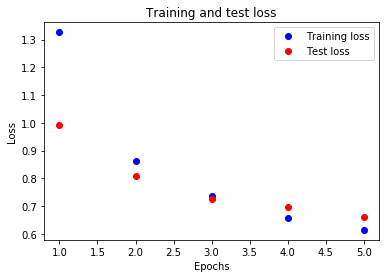

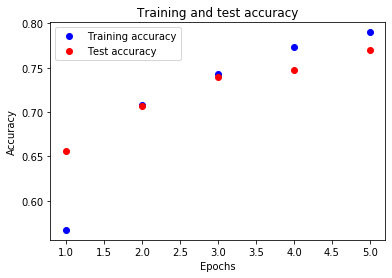

In [0]:
#use only portion of training data, with less training data model has less room to learn, could produce underfitting
train_images_less = np.zeros((2000, 28 * 28))
train_labels_less = np.zeros((2000, 10))
i = 0
j = 0
while (i < 60000):
  train_images_less[j] = train_images[i]
  train_labels_less[j] = train_labels[i]
  i = i + 30
  j = j + 1

#create model
underfit = models.Sequential()
underfit.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
underfit.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 5

results_underfit = underfit.fit(train_images_less, train_labels_less, epochs=epochs, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results_underfit.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Seeing the output graph above, the use of much less training data over few epochs, with a simple model of one dense layer causes the testing to increase in a somewhat linear way. This is a high bias in the model, meaning the model will underfit.

# Overfitting the MNSIT Fashion data set

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.4824 - acc: 0.8299 - val_loss: 0.4355 - val_acc: 0.8383
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.3642 - acc: 0.8671 - val_loss: 0.3790 - val_acc: 0.8618
Epoch 3/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.3258 - acc: 0.8804 - val_loss: 0.3652 - val_acc: 0.8696
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.3044 - acc: 0.8880 - val_loss: 0.3656 - val_acc: 0.8703
Epoch 5/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2851 - acc: 0.8951 - val_loss: 0.3298 - val_acc: 0.8827
Epoch 6/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2730 - acc: 0.8984 - val_loss: 0.3453 - val_acc: 0.8759
Epoch 7/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2575 - acc: 0.9045 - val_loss: 0.

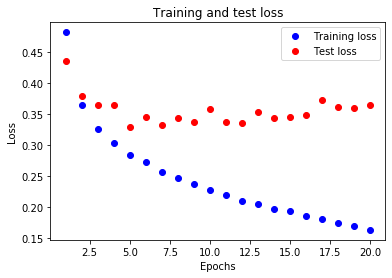

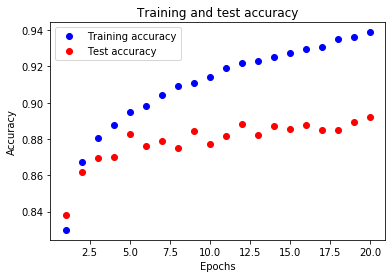

In [0]:
#here the entire training data will be used, the model will just have more layers and nodes, without any drop off. 
#with a very complex model, it should overfit this data, forming too much to it
overfit = models.Sequential()
overfit.add(layers.Dense(250, activation='relu', input_shape=(28 * 28,)))
overfit.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))

overfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 20

results_overfit = overfit.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results_overfit.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the graph above, it is seen the test accuracy starts to fall off from the training accuracy. That is, the model starts to form too much to the training data, and the validation reaches a low point in loss where the loss starts to go up again. This is a case of overfitting

# Attempt to properly fit MNIST Fashion data set

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 289us/step - loss: 0.5799 - acc: 0.7942 - val_loss: 0.4343 - val_acc: 0.8453
Epoch 2/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.4409 - acc: 0.8399 - val_loss: 0.4089 - val_acc: 0.8502
Epoch 3/15
60000/60000 [==============================] - 9s 155us/step - loss: 0.4090 - acc: 0.8493 - val_loss: 0.3872 - val_acc: 0.8613
Epoch 4/15
60000/60000 [==============================] - 9s 155us/step - loss: 0.3890 - acc: 0.8577 - val_loss: 0.3741 - val_acc: 0.8670
Epoch 5/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.3744 - acc: 0.8620 - val_loss: 0.3741 - val_acc: 0.8634
Epoch 6/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.3640 - acc: 0.8667 - val_loss: 0.3685 - val_acc: 0.8699
Epoch 7/15
60000/60000 [==============================] - 10s 159us/step - loss: 0.3559 - acc: 0.8682 - val_loss: 0.3575 

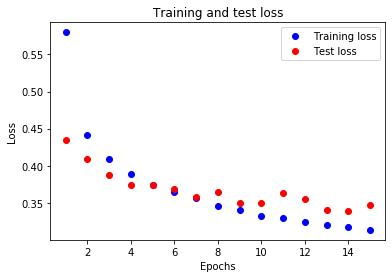

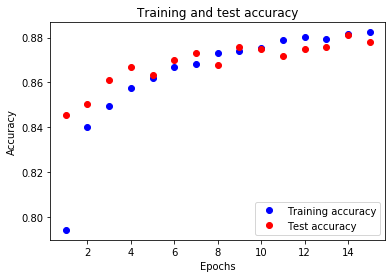

In [0]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(.4))
model.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15

results = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looking at this model, we find that the curves of the training data and testing data fall much closer together, that is there is not a huge difference in loss between the training and testing data. This puts the model in a better direction of fit